# Pandas练习题50题

>作者：王大毛，和鲸社区
>
>出处：https://www.kesci.com/home/project/5ddc974ef41512002cec1dca
>
>修改：黄海广

Pandas 是基于 NumPy 的一种数据处理工具，该工具为了解决数据分析任务而创建。Pandas 纳入了大量库和一些标准的数据模型，提供了高效地操作大型数据集所需的函数和方法。 这些练习着重DataFrame和Series对象的基本操作，包括数据的索引、分组、统计和清洗。

## 基本操作
### 1.导入 Pandas 库并简写为 pd，并输出版本号

In [1]:
import pandas as pd
pd.__version__

'1.0.5'

### 2. 从列表创建 Series

In [2]:
arr = [0, 1, 2, 3, 4]
df = pd.Series(arr) # 如果不指定索引，则默认从 0 开始
df

0    0
1    1
2    2
3    3
4    4
dtype: int64

### 3. 从字典创建 Series

In [3]:
d = {'a':1,'b':2,'c':3,'d':4,'e':5}
df = pd.Series(d)
df

a    1
b    2
c    3
d    4
e    5
dtype: int64

### 4. 从 NumPy 数组创建 DataFrame

In [4]:
import numpy as np
dates = pd.date_range('today', periods=6)  # 定义时间序列作为 index
num_arr = np.random.randn(6, 4)  # 传入 numpy 随机数组
columns = ['A', 'B', 'C', 'D']  # 将列表作为列名
df = pd.DataFrame(num_arr, index=dates, columns=columns)
df

,A,B,C,D
2021-02-02 21:17:05.048551,-1.253390,-0.155125,-1.270799,-0.292398
2021-02-03 21:17:05.048551,-0.029758,-0.170542,-0.844548,-0.084561
2021-02-04 21:17:05.048551,1.370029,0.435405,-1.187731,0.970319
2021-02-05 21:17:05.048551,0.894971,0.649491,0.369239,-1.099368
2021-02-06 21:17:05.048551,1.407313,0.530396,-0.083082,1.543790
2021-02-07 21:17:05.048551,1.468132,0.832214,-0.150410,-0.335418


### 5. 从CSV中创建 DataFrame，分隔符为“；”，编码格式为gbk

### 6. 从字典对象创建DataFrame，并设置索引

In [5]:
import numpy as np
data = {
    'animal':
    ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
    'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
    'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
    'priority':
    ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']
}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
df = pd.DataFrame(data, index=labels)
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


### 7. 显示df的基础信息，包括行的数量；列名；每一列值的数量、类型

In [6]:
df.info()
# 方法二
# df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   animal    10 non-null     object 
 1   age       8 non-null      float64
 2   visits    10 non-null     int64  
 3   priority  10 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 400.0+ bytes


### 8. 展示df的前3行

In [7]:
df.iloc[:3]
# 方法二
#df.head(3)

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


### 9. 取出df的animal和age列

In [8]:
df.loc[:, ['animal', 'age']]
# 方法二
# df[['animal', 'age']]

,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


### 10. 取出索引为[3, 4, 8]行的animal和age列

In [9]:
df.loc[df.index[[3, 4, 8]], ['animal', 'age']]

,animal,age
d,dog,NaN
e,dog,5.0
i,dog,7.0


### 11. 取出age值大于3的行

In [10]:
df[df['age'] > 3]

,animal,age,visits,priority
e,dog,5.0,2,no
g,snake,4.5,1,no
i,dog,7.0,2,no


### 12. 取出age值缺失的行

In [11]:
df[df['age'].isnull()]

,animal,age,visits,priority
d,dog,NaN,3,yes
h,cat,NaN,1,yes


### 13.取出age在2,4间的行（不含）

In [12]:
df[(df['age']>2) & (df['age']>4)]
# 方法二
# df[df['age'].between(2, 4)]

,animal,age,visits,priority
e,dog,5.0,2,no
g,snake,4.5,1,no
i,dog,7.0,2,no


### 14. f行的age改为1.5

In [13]:
df.loc['f', 'age'] = 1.5

### 15. 计算visits的总和

In [14]:
df['visits'].sum()

19

### 16. 计算每个不同种类animal的age的平均数

In [15]:
df.groupby('animal')['age'].mean()

animal
cat      2.333333
dog      5.000000
snake    2.500000
Name: age, dtype: float64

### 17. 在df中插入新行k，然后删除该行

In [16]:
#插入
df.loc['k'] = [5.5, 'dog', 'no', 2]
# 删除
df = df.drop('k')
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5,2,no
f,cat,1.5,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7,2,no
j,dog,3,1,no


### 18. 计算df中每个种类animal的数量

In [17]:
df['animal'].value_counts()

dog      4
cat      4
snake    2
Name: animal, dtype: int64

### 19. 先按age降序排列，后按visits升序排列

In [18]:
df.sort_values(by=['age', 'visits'], ascending=[False, True])

,animal,age,visits,priority
i,dog,7,2,no
e,dog,5,2,no
g,snake,4.5,1,no
j,dog,3,1,no
b,cat,3,3,yes
a,cat,2.5,1,yes
f,cat,1.5,3,no
c,snake,0.5,2,no
h,cat,NaN,1,yes
d,dog,NaN,3,yes


### 20. 将priority列中的yes, no替换为布尔值True, False

In [19]:
df['priority'] = df['priority'].map({'yes': True, 'no': False})
df

,animal,age,visits,priority
a,cat,2.5,1,True
b,cat,3,3,True
c,snake,0.5,2,False
d,dog,NaN,3,True
e,dog,5,2,False
f,cat,1.5,3,False
g,snake,4.5,1,False
h,cat,NaN,1,True
i,dog,7,2,False
j,dog,3,1,False


### 21. 将animal列中的snake替换为python

In [20]:
df['animal'] = df['animal'].replace('snake', 'python')
df

,animal,age,visits,priority
a,cat,2.5,1,True
b,cat,3,3,True
c,python,0.5,2,False
d,dog,NaN,3,True
e,dog,5,2,False
f,cat,1.5,3,False
g,python,4.5,1,False
h,cat,NaN,1,True
i,dog,7,2,False
j,dog,3,1,False


### 22. 对每种animal的每种不同数量visits，计算平均age，即，返回一个表格，行是aniaml种类，列是visits数量，表格值是行动物种类列访客数量的平均年龄

In [21]:
df.pivot_table(index='animal', columns='visits', values='age', aggfunc='mean')

DataError: No numeric types to aggregate

### 进阶操作
### 23. 有一列整数列A的DatraFrame，删除数值重复的行

In [22]:
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
print(df)
df1 = df.loc[df['A'].shift() != df['A']]
# 方法二
# df1 = df.drop_duplicates(subset='A')
print(df1)

    A
0   1
1   2
2   2
3   3
4   4
5   5
6   5
7   5
8   6
9   7
10  7
   A
0  1
1  2
3  3
4  4
5  5
8  6
9  7


### 24. 一个全数值DatraFrame，每个数字减去该行的平均数

In [23]:
df = pd.DataFrame(np.random.random(size=(5, 3)))
print(df)
df1 = df.sub(df.mean(axis=1), axis=0)
print(df1)

          0         1         2
0  0.669854  0.635015  0.963489
1  0.355585  0.933766  0.984338
2  0.133081  0.135097  0.200581
3  0.091280  0.708175  0.526943
4  0.741172  0.824335  0.457728
          0         1         2
0 -0.086265 -0.121105  0.207370
1 -0.402311  0.175870  0.226442
2 -0.023172 -0.021156  0.044328
3 -0.350853  0.266043  0.084810
4  0.066760  0.149924 -0.216684


### 25. 一个有5列的DataFrame，求哪一列的和最小

In [24]:
df = pd.DataFrame(np.random.random(size=(5, 5)), columns=list('abcde'))
print(df)
df.sum().idxmin()

          a         b         c         d         e
0  0.965221  0.597118  0.188160  0.675563  0.026766
1  0.265133  0.290728  0.505659  0.825649  0.408048
2  0.318028  0.794883  0.447467  0.410883  0.835045
3  0.502794  0.316841  0.787477  0.531605  0.915278
4  0.750517  0.341732  0.987632  0.385344  0.474827


'b'

### 26. 给定DataFrame，求A列每个值的前3大的B的值的和

In [25]:
df = pd.DataFrame({'A': list('aaabbcaabcccbbc'), 
                   'B': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})
print(df)
df1 = df.groupby('A')['B'].nlargest(3).sum(level=0)
print(df1)

    A    B
0   a   12
1   a  345
2   a    3
3   b    1
4   b   45
5   c   14
6   a    4
7   a   52
8   b   54
9   c   23
10  c  235
11  c   21
12  b   57
13  b    3
14  c   87
A
a    409
b    156
c    345
Name: B, dtype: int64


### 27. 给定DataFrame，有列A, B，A的值在1-100（含），对A列每10步长，求对应的B的和

In [26]:
df = pd.DataFrame({
    'A': [1, 2, 11, 11, 33, 34, 35, 40, 79, 99],
    'B': [1, 2, 11, 11, 33, 34, 35, 40, 79, 99]
})
print(df)
df1 = df.groupby(pd.cut(df['A'], np.arange(0, 101, 10)))['B'].sum()
print(df1)

    A   B
0   1   1
1   2   2
2  11  11
3  11  11
4  33  33
5  34  34
6  35  35
7  40  40
8  79  79
9  99  99
A
(0, 10]        3
(10, 20]      22
(20, 30]       0
(30, 40]     142
(40, 50]       0
(50, 60]       0
(60, 70]       0
(70, 80]      79
(80, 90]       0
(90, 100]     99
Name: B, dtype: int64


### 28. 给定DataFrame，计算每个元素至左边最近的0（或者至开头）的距离，生成新列y

In [27]:
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})
# 方法一
x = (df['X'] != 0).cumsum()
y = x != x.shift()
df['Y'] = y.groupby((y != y.shift()).cumsum()).cumsum()
print(df)

   X    Y
0  7  1.0
1  2  2.0
2  0  0.0
3  3  1.0
4  4  2.0
5  2  3.0
6  5  4.0
7  0  0.0
8  3  1.0
9  4  2.0


In [28]:
# 方法二
df['Y'] = df.groupby((df['X'] == 0).cumsum()).cumcount()
first_zero_idx = (df['X'] == 0).idxmax()
df['Y'].iloc[0:first_zero_idx] += 1
print(df)

   X  Y
0  7  1
1  2  2
2  0  0
3  3  1
4  4  2
5  2  3
6  5  4
7  0  0
8  3  1
9  4  2


### 29. 一个全数值的DataFrame，返回最大3个值的坐标

In [29]:
df = pd.DataFrame(np.random.random(size=(5, 3)))
print(df)
df.unstack().sort_values()[-3:].index.tolist()

          0         1         2
0  0.798245  0.037103  0.494145
1  0.377028  0.871639  0.947769
2  0.891999  0.114816  0.509551
3  0.261600  0.149759  0.578922
4  0.427820  0.143455  0.306258


[(1, 1), (0, 2), (2, 1)]

### 30. 给定DataFrame，将负值代替为同组的平均值

In [30]:
df = pd.DataFrame({
    'grps':
    list('aaabbcaabcccbbc'),
    'vals': [-12, 345, 3, 1, 45, 14, 4, -52, 54, 23, -235, 21, 57, 3, 87]
})
print(df)


def replace(group):
    mask = group < 0
    group[mask] = group[~mask].mean()
    return group


df['vals'] = df.groupby(['grps'])['vals'].transform(replace)
print(df)

   grps  vals
0     a   -12
1     a   345
2     a     3
3     b     1
4     b    45
5     c    14
6     a     4
7     a   -52
8     b    54
9     c    23
10    c  -235
11    c    21
12    b    57
13    b     3
14    c    87
   grps        vals
0     a  117.333333
1     a  345.000000
2     a    3.000000
3     b    1.000000
4     b   45.000000
5     c   14.000000
6     a    4.000000
7     a  117.333333
8     b   54.000000
9     c   23.000000
10    c   36.250000
11    c   21.000000
12    b   57.000000
13    b    3.000000
14    c   87.000000


### 31. 计算3位滑动窗口的平均值，忽略NAN

In [31]:
df = pd.DataFrame({
    'group': list('aabbabbbabab'),
    'value': [1, 2, 3, np.nan, 2, 3, np.nan, 1, 7, 3, np.nan, 8]
})
print(df)

g1 = df.groupby(['group'])['value']
g2 = df.fillna(0).groupby(['group'])['value']

s = g2.rolling(3, min_periods=1).sum() / g1.rolling(3, min_periods=1).count()
s.reset_index(level=0, drop=True).sort_index()

   group  value
0      a    1.0
1      a    2.0
2      b    3.0
3      b    NaN
4      a    2.0
5      b    3.0
6      b    NaN
7      b    1.0
8      a    7.0
9      b    3.0
10     a    NaN
11     b    8.0


0     1.000000
1     1.500000
2     3.000000
3     3.000000
4     1.666667
5     3.000000
6     3.000000
7     2.000000
8     3.666667
9     2.000000
10    4.500000
11    4.000000
Name: value, dtype: float64

## Series 和 Datetime索引
### 32. 创建Series s，将2015所有工作日作为随机值的索引

In [32]:
dti = pd.date_range(start='2015-01-01', end='2015-12-31', freq='B') 
s = pd.Series(np.random.rand(len(dti)), index=dti)

s.head(10)

2015-01-01    0.090717
2015-01-02    0.541035
2015-01-05    0.431046
2015-01-06    0.712295
2015-01-07    0.397147
2015-01-08    0.120314
2015-01-09    0.370391
2015-01-12    0.442878
2015-01-13    0.071661
2015-01-14    0.421419
Freq: B, dtype: float64

### 33. 所有礼拜三的值求和

In [33]:
s[s.index.weekday == 2].sum()

24.844327665673482

### 34. 求每个自然月的平均数

In [34]:
s.resample('M').mean()

2015-01-31    0.472181
2015-02-28    0.615075
2015-03-31    0.351859
2015-04-30    0.485010
2015-05-31    0.459935
2015-06-30    0.411303
2015-07-31    0.603525
2015-08-31    0.564628
2015-09-30    0.499255
2015-10-31    0.436654
2015-11-30    0.501405
2015-12-31    0.509095
Freq: M, dtype: float64

### 35. 每连续4个月为一组，求最大值所在的日期

In [35]:
s.groupby(pd.Grouper(freq='4M')).idxmax()

2015-01-31   2015-01-22
2015-05-31   2015-02-20
2015-09-30   2015-07-24
2016-01-31   2015-11-23
Freq: 4M, dtype: datetime64[ns]

### 36. 创建2015-2016每月第三个星期四的序列

In [36]:
pd.date_range('2015-01-01', '2016-12-31', freq='WOM-3THU')
#数据清洗
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,NaN,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,NaN,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


### 37. FlightNumber列中有些值缺失了，他们本来应该是每一行增加10，填充缺失的数值，并且令数据类型为整数

In [37]:
df['FlightNumber'] = df['FlightNumber'].interpolate().astype(int)
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055,[],<Air France> (12)
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075,[13],12. Air France
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air"""


### 38. 将From_To列从_分开，分成From, To两列，并删除原始列

In [38]:
temp = df.From_To.str.split('_', expand=True)
temp.columns = ['From', 'To']
df = df.join(temp)
df = df.drop('From_To', axis=1)
df

,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM(!),LoNDon,paris
1,10055,[],<Air France> (12),MAdrid,miLAN
2,10065,"[24, 43, 87]",(British Airways. ),londON,StockhOlm
3,10075,[13],12. Air France,Budapest,PaRis
4,10085,"[67, 32]","""Swiss Air""",Brussels,londOn


### 39. 将From, To大小写统一首字母大写其余小写

In [39]:
df['From'] = df['From'].str.capitalize()
df['To'] = df['To'].str.capitalize()
df

,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM(!),London,Paris
1,10055,[],<Air France> (12),Madrid,Milan
2,10065,"[24, 43, 87]",(British Airways. ),London,Stockholm
3,10075,[13],12. Air France,Budapest,Paris
4,10085,"[67, 32]","""Swiss Air""",Brussels,London


### 40. Airline列，有一些多余的标点符号，需要提取出正确的航司名称。举例：'(British Airways. )' 应该改为 'British Airways'.

In [40]:
df['Airline'] = df['Airline'].str.extract(
    '([a-zA-Z\s]+)', expand=False).str.strip()
df

,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM,London,Paris
1,10055,[],Air France,Madrid,Milan
2,10065,"[24, 43, 87]",British Airways,London,Stockholm
3,10075,[13],Air France,Budapest,Paris
4,10085,"[67, 32]",Swiss Air,Brussels,London


### 41. Airline列，数据被以列表的形式录入，但是我们希望每个数字被录入成单独一列，delay_1, delay_2, ...没有的用NAN替代。

In [41]:
delays = df['RecentDelays'].apply(pd.Series)
delays.columns = ['delay_{}'.format(n) for n in range(1, len(delays.columns)+1)]
df = df.drop('RecentDelays', axis=1).join(delays)
df

,FlightNumber,Airline,From,To,delay_1,delay_2,delay_3
0,10045,KLM,London,Paris,23.0,47.0,NaN
1,10055,Air France,Madrid,Milan,NaN,NaN,NaN
2,10065,British Airways,London,Stockholm,24.0,43.0,87.0
3,10075,Air France,Budapest,Paris,13.0,NaN,NaN
4,10085,Swiss Air,Brussels,London,67.0,32.0,NaN


## 层次化索引
### 42. 用 letters = ['A', 'B', 'C']和 numbers = list(range(10))的组合作为系列随机值的层次化索引

In [42]:
letters = ['A', 'B', 'C']
numbers = list(range(4))

mi = pd.MultiIndex.from_product([letters, numbers])
s = pd.Series(np.random.rand(12), index=mi)
s

A  0    0.687756
   1    0.363317
   2    0.801462
   3    0.887494
B  0    0.716624
   1    0.328909
   2    0.073781
   3    0.173486
C  0    0.233218
   1    0.212626
   2    0.337868
   3    0.428684
dtype: float64

### 43. 检查s是否是字典顺序排序的

In [43]:
s.index.is_lexsorted()
# 方法二
# s.index.lexsort_depth == s.index.nlevels

True

### 44. 选择二级索引为1, 3的行

In [44]:
s.loc[:, [1, 3]]

A  1    0.363317
   3    0.887494
B  1    0.328909
   3    0.173486
C  1    0.212626
   3    0.428684
dtype: float64

### 45. 对s进行切片操作，取一级索引至B，二级索引从2开始到最后

In [45]:
s.loc[pd.IndexSlice[:'B', 2:]]
# 方法二
# s.loc[slice(None, 'B'), slice(2, None)]

A  2    0.801462
   3    0.887494
B  2    0.073781
   3    0.173486
dtype: float64

### 46. 计算每个一级索引的和（A, B, C每一个的和）

In [46]:
s.sum(level=0)
#方法二
#s.unstack().sum(axis=0)

A    2.740029
B    1.292800
C    1.212395
dtype: float64

### 47. 交换索引等级，新的Series是字典顺序吗？不是的话请排序

In [47]:
new_s = s.swaplevel(0, 1)
print(new_s)
print(new_s.index.is_lexsorted())
new_s = new_s.sort_index()
print(new_s)

0  A    0.687756
1  A    0.363317
2  A    0.801462
3  A    0.887494
0  B    0.716624
1  B    0.328909
2  B    0.073781
3  B    0.173486
0  C    0.233218
1  C    0.212626
2  C    0.337868
3  C    0.428684
dtype: float64
False
0  A    0.687756
   B    0.716624
   C    0.233218
1  A    0.363317
   B    0.328909
   C    0.212626
2  A    0.801462
   B    0.073781
   C    0.337868
3  A    0.887494
   B    0.173486
   C    0.428684
dtype: float64


In [48]:
## 可视化
import matplotlib.pyplot as plt
df = pd.DataFrame({"xs": [1, 5, 2, 8, 1], "ys": [4, 2, 1, 9, 6]})
plt.style.use('ggplot')

### 48. 画出df的散点图

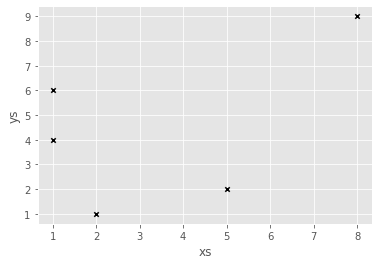

In [49]:
df.plot.scatter("xs", "ys", color = "black", marker = "x")

### 49. 可视化指定4维DataFrame

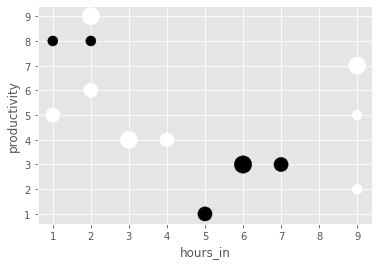

In [50]:
df = pd.DataFrame({
    "productivity": [5, 2, 3, 1, 4, 5, 6, 7, 8, 3, 4, 8, 9],
    "hours_in": [1, 9, 6, 5, 3, 9, 2, 9, 1, 7, 4, 2, 2],
    "happiness": [2, 1, 3, 2, 3, 1, 2, 3, 1, 2, 2, 1, 3],
    "caffienated": [0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0]
})

df.plot.scatter(
    "hours_in", "productivity", s=df.happiness * 100, c=df.caffienated)

### 50. 在同一个图中可视化2组数据，共用X轴，但y轴不同

(-1.0, 12.0)

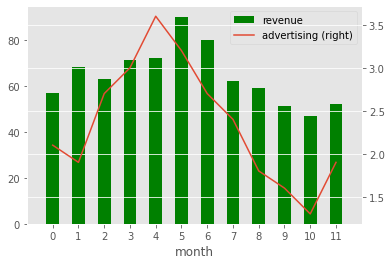

In [51]:
df = pd.DataFrame({
    "revenue": [57, 68, 63, 71, 72, 90, 80, 62, 59, 51, 47, 52],
    "advertising":
    [2.1, 1.9, 2.7, 3.0, 3.6, 3.2, 2.7, 2.4, 1.8, 1.6, 1.3, 1.9],
    "month":
    range(12)
})

ax = df.plot.bar("month", "revenue", color="green")
df.plot.line("month", "advertising", secondary_y=True, ax=ax)
ax.set_xlim((-1, 12))